In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
X = np.load(os.getcwd() + '/processed_data/proc_X.npy', allow_pickle=True)
y = np.load(os.getcwd() + '/processed_data/proc_y.npy', allow_pickle=True)

In [4]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:
model = load_model(os.getcwd() + '/models/best_model.h5')
preds = model.predict(X)
preds = np.argmax(preds, axis=1)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-11-22 12:07:36.621678: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-22 12:07:36.621804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-22 12:07:36.833427: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 12:07:36.835934: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-22 12:07:36.888942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [6]:
preds_dec = le.inverse_transform(preds)
cm = confusion_matrix(y, preds_dec)
cm_df = pd.DataFrame(cm, index=[l for l in le.classes_], columns=[l for l in le.classes_])

Accuracy:  0.28797083839611176


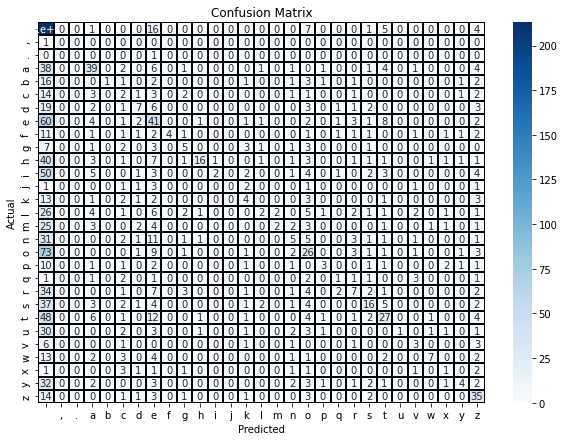

In [15]:
print('Accuracy: ', accuracy_score(y, preds_dec))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, linewidths=2, linecolor='black', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()